<h1>Taller 5: Grafos y Algoritmos voraces</h1>

Librerias

In [1]:
from IPython.display import Image
import numpy as np
import random as rnd
from heapq import heappush, heappop
import matplotlib.pyplot as pl
import time
%matplotlib inline

<h3>Punto 1</h3>

<i>Implemente el algoritmo de búsqueda en profundidad (DFS) y pruebelo para recorrer el grafo del laberinto de pacman.</i>

1 . Construcción del grafo.

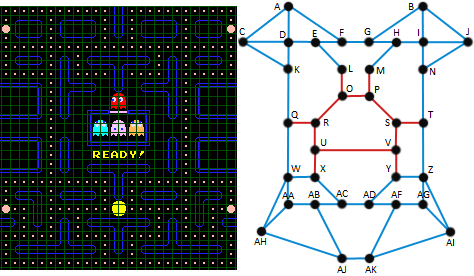

In [2]:
Image(filename='pacman--graph.png')

In [3]:
graph ={'A':  set(['C', 'D', 'F']),
        'B':  set(['G', 'I', 'J']),
        'C':  set(['A', 'D', 'K']),
        'D':  set(['A', 'C', 'E', 'K']),
        'E':  set(['D', 'F', 'L']),
        'F':  set(['A', 'E', 'G']),
        'G':  set(['B', 'F', 'H']),
        'H':  set(['G', 'I', 'M']),
        'I':  set(['B', 'H', 'J', 'N']),
        'J':  set(['B', 'I', 'N']),
        'K':  set(['C', 'D', 'Q']),
        'L':  set(['E', 'O']),
        'M':  set(['H', 'P']),
        'N':  set(['I', 'J', 'T']),
        'O':  set(['L', 'P', 'R']),
        'P':  set(['M', 'O', 'S']),
        'Q':  set(['K', 'R', 'W']),
        'R':  set(['O', 'Q', 'U']),
        'S':  set(['P', 'T', 'V']),
        'T':  set(['N', 'S', 'Z']),
        'U':  set(['R', 'V', 'X']),
        'V':  set(['S', 'U', 'Y']),
        'W':  set(['Q', 'X', 'AA', 'AH']),
        'X':  set(['U', 'W', 'AC']),
        'Y':  set(['V', 'Z', 'AD']),
        'Z':  set(['T', 'Y', 'AG', 'AI']),
        'AA': set(['W', 'AB', 'AH']),
        'AB': set(['AA', 'AC', 'AJ']),
        'AC': set(['X', 'AB', 'AD']),
        'AD': set(['Y', 'AC', 'AF']),
        'AF': set(['AD', 'AG', 'AK']),
        'AG': set(['Z', 'AF', 'AI']),
        'AH': set(['W', 'AA', 'AJ']),
        'AI': set(['Z', 'AG', 'AK']),
        'AJ': set(['AB', 'AH', 'AK']),
        'AK': set(['AF', 'AI', 'AJ'])
       }

2 . Búsqueda en profundidad.

In [4]:
def dfs(graph, start):
    visited, stack = set(), [start]
    path = []
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
            path.append(vertex)
    return path

Camino:
['A', 'F', 'G', 'B', 'J', 'N', 'T', 'Z', 'AG', 'AF', 'AD', 'AC', 'AB', 'AJ', 'AK', 'AI', 'AH', 'W', 'AA', 'X', 'U', 'V', 'S', 'P', 'O', 'L', 'E', 'D', 'K', 'C', 'Q', 'R', 'M', 'H', 'I', 'Y']


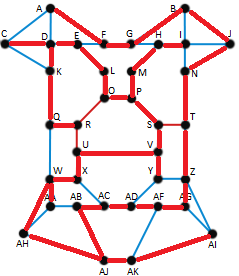

In [5]:
start = 'A'
path = dfs(graph, start)

print "Camino:\n", path
Image(filename='pacman--graph--path.png')

<h3>Punto 2</h3>

<i>Realice el análisis del tiempo de ejecución del algoritmo DFS, justifiquelo.</i>

1 . Generar grafo areatorio.

In [6]:
def randomGraph(n):
    if n > 26:
        n = 26
    if n < 1:
        n=1
        
    for x in range(1, n+1):
        l1 = [chr(n) for n in rnd.sample(range(65, 65+x), x)]
        
    l2 = []
    for y in range(len(l1)):
        l1_c = l1[0:y]+l1[y+1:len(l1)]
        neighbors = rnd.sample(l1_c, rnd.randint(0,len(l1)-1))
        l2.append(set(neighbors))
    
    g = dict(zip(l1, l2))

    return l1, g

2 . Obtener tiempo que se ejecuta.

In [7]:
def analysis(n):
    timeP = []
    for i in range(1, n+1):
        nodes, graph = randomGraph(i)
        start = rnd.choice(nodes)
        
        tic = time.clock()
        dfs(graph, start)
        toc = time.clock()
        timeP.append(toc - tic)
        
    return timeP

3 . Graficar.
<br>La complejidad de este algoritmo es de $0(b^d)$ donde $b$ es máximo factor del número de ramas del grafo y $d$ es la profundidad máxima.</br>

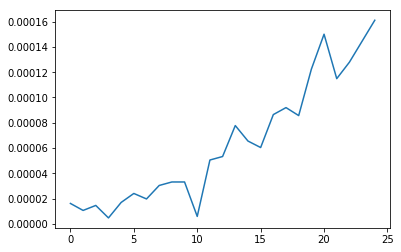

In [8]:
pl.clf()
x = np.arange(25)
y = np.array(analysis(25))

pl.plot(x, y)

<h3>Punto 3</h3>

<i>Diseñe e implemente un algoritmo que identifique ciclos en un grafo.</i>

In [9]:
def findCycles(graph, start, end):
    fringe = [(start, [])]
    while fringe:
        state, path = fringe.pop()
        if path and state == end:
            yield path
            continue
        for next_state in graph[state]:
            if next_state in path:
                continue
            fringe.append((next_state, path+[next_state]))

Ciclos:
['A', 'C', 'E', 'D', 'A']
['A', 'C', 'A']
['C', 'E', 'D', 'A', 'C']
['C', 'A', 'C']
['E', 'D', 'E']
['E', 'D', 'A', 'C', 'E']
['D', 'E', 'D']
['D', 'A', 'C', 'E', 'D']


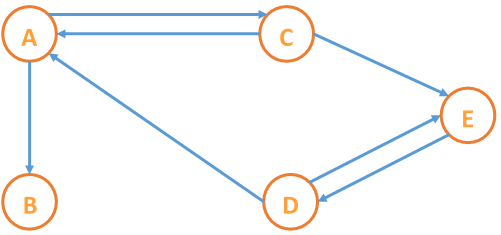

In [10]:
graph_cycle ={'A': set(['B', 'C']),
              'B': set([]),
              'C': set(['A', 'E']),
              'D': set(['A', 'E']),
              'E': set(['D'])
             }

cycles = [[node]+path  for node in graph_cycle for path in findCycles(graph_cycle, node, node)]

print "Ciclos:"
for i in range (len(cycles)):
    print cycles[i]
Image(filename='graph--cycle.png')

<h3>Punto 4</h3>

<i>Diseñe e implemente un algoritmo que verifique si un grafo es bipartito o no.</i>

Condiciones:
1. Las cantidades de nodos deben ser mayor a 2.
2. Los ciclos que tengan en el grafo no pueden ser nodos impares.
3. El grafo es dirigido.

In [11]:
def is_bipartite(graph):
    if len(graph) < 2:
        return False
    
    cycles = [[node]+path  for node in graph for path in findCycles(graph, node, node)]
    
    if len(cycles) == 0:
        return False
    
    for i in range (len(cycles)):
        if (len(cycles[i])-1) % 2 != 0:
            return False
        
    return True

Image 1:  False
Image 2:  True


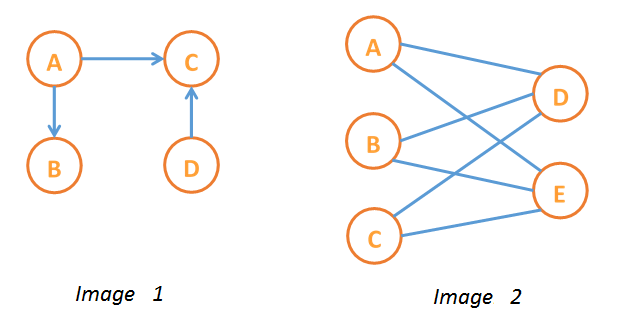

In [12]:
graph_bi1 ={'A': set(['B', 'C']),
            'B': set([]),
            'C': set([]),
            'D': set(['C'])
           }
graph_bi2 ={'A': set(['D', 'E']),
            'B': set(['D', 'E']),
            'C': set(['D', 'E']),
            'D': set(['A', 'B', 'C']),
            'E': set(['A', 'B', 'C'])
           }

print "Image 1: ", is_bipartite(graph_bi1)
print "Image 2: ", is_bipartite(graph_bi2)
Image(filename='graph--bipartite.png')

<h3>Punto 5</h3>

<i>Modifique el algoritmo de dijkstra para solucionar el problema de la ruta más corta en un grafo sin pesos, i.e. partiendo de un vertice inicial encontrar la ruta y su distancia a todos los demás vertices haciendo la menor cantidad de saltos (vertices en la ruta).</i>

<br>Como no existe los costos en el camino, se mirá como un costo de 1 en todas las aristas.</br>

In [13]:
def updateheap(heap,d,v):
    for i in range(len(heap)):
        if heap[i][1] == v:
            heap[i][0] = d
            fix_minheap(heap,i) # heap=heapify(heap) ineficient      
            break    

def fix_minheap(heap, i):
    if i == 0: return  
    p = int(i/2) #parent  
    if p >= 0 and heap[p][0] > heap[i][0]:
        heap[i], heap[p] = heap[p], heap[i]
        fix_minheap(heap,p)   
            
def Dijkstra(G,start):
        
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    for v in G:
        item = []
        item.append(D[v])
        item.append(v)
        heappush(Q,item)
    
    #S = []
    while Q:
        u = heappop(Q)[1]
        #S.append(u)
        for v in G[u]:
            newDuv = D[u] + 1
            if newDuv < D[v]:
                P[v] = u
                D[v] = newDuv
                updateheap(Q,D[v],v)
    return D, P

Saltos de cada nodo desde S :
{'Y': 2, 'X': 1, 'S': 0, 'U': 1, 'V': 2}
Camino mas corto desde S :
{'Y': 'X', 'X': 'S', 'U': 'S', 'V': 'X'}


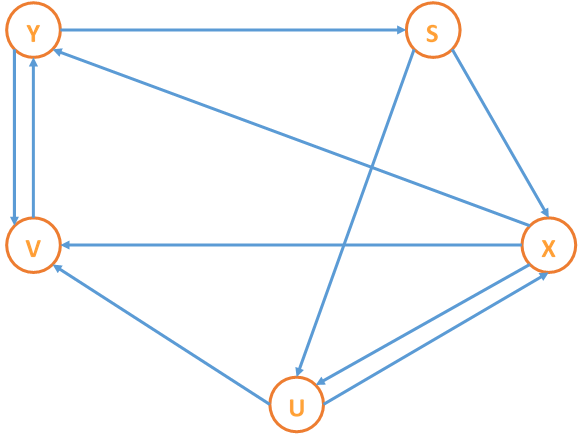

In [14]:
graph_dijk = {'S': {'U', 'X'},
             'U': {'V', 'X'},
             'V': {'Y'},
             'X':{'U','V','Y'},
             'Y':{'S','V'}
            }
start = 'S'

jump, path = Dijkstra(graph_dijk, start)

print "Saltos de cada nodo desde", start, ":\n", jump
print "Camino mas corto desde", start, ":\n", path
Image(filename='graph--dijk.png')

<h3>Bibliografía</h3>

<br>http://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/</br>
<br>http://stackoverflow.com/questions/40833612/find-all-cycles-in-a-graph-implementation</br>